<a href="https://colab.research.google.com/github/sightes/COFFETALKS/blob/main/Clase_19_Coderhouse_DS_Caso_Estudio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!wget "https://drive.google.com/u/2/uc?id=1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625&export=download" -O BankMarketing.csv
!wget "https://drive.google.com/u/2/uc?id=1Zy5Qm7Hq1TAGpmEsSRa2aD1IyNkdXXBi&export=download" -O TelcoCustomerChurn.csv
!wget "https://drive.google.com/u/2/uc?id=1KL6GLCbHh3lRCKFa2SQGx-QBcQh-SK9d&export=download" -O BigMartSales.csv
!wget "https://drive.google.com/u/2/uc?id=1jJmet47e7jH9ilo8L48XkDp7MiJqvB-M&export=download" -O HRAnalytics.csv

--2022-01-18 00:44:02--  https://drive.google.com/u/2/uc?id=1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625&export=download
Resolving drive.google.com (drive.google.com)... 142.251.107.100, 142.251.107.113, 142.251.107.139, ...
Connecting to drive.google.com (drive.google.com)|142.251.107.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-10-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t4s9c3n157qtq8l9ick7k2t2qaf7unbp/1642466625000/18340134811011616317/*/1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625?e=download [following]
--2022-01-18 00:44:02--  https://doc-10-30-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/t4s9c3n157qtq8l9ick7k2t2qaf7unbp/1642466625000/18340134811011616317/*/1C-m8xMV61MNJE0yzSuDDQDEBRwY1o625?e=download
Resolving doc-10-30-docs.googleusercontent.com (doc-10-30-docs.googleusercontent.com)... 64.233.170.132, 2607:f8b0:400c:c0d::84
Connecting to doc-10-30-docs.googleusercontent.com

Resultado varilacion cruzada:
Promedio Resultado:  91.01315322789652
Desviacion standar 0.17626023799766063
Matris de confucion:
[[10460   509]
 [  544   844]]
resultado clasificacion:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10969
           1       0.62      0.61      0.62      1388

    accuracy                           0.91     12357
   macro avg       0.79      0.78      0.78     12357
weighted avg       0.91      0.91      0.91     12357

Accuracy:  0.9147851420247632


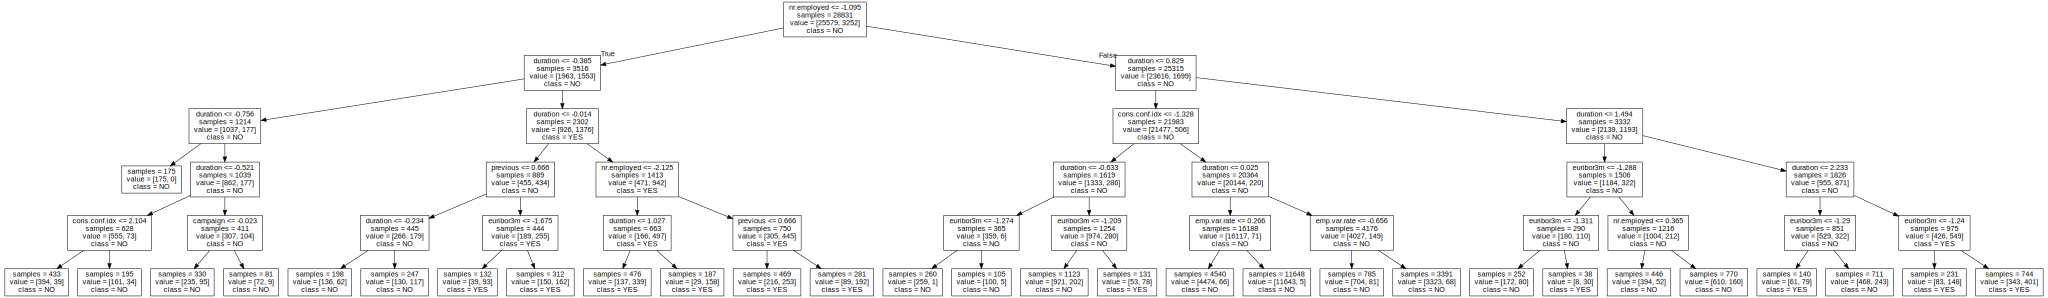

In [34]:
#import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
import sklearn.metrics as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# ORIGEN DATA : https://archive.ics.uci.edu/ml/datasets/Bank%2BMarketing
# KAGGLE DATA :https://www.kaggle.com/henriqueyamahata/bank-marketing/code

df=pd.read_csv('BankMarketing.csv',sep=';')
df1=df.drop(columns=['day_of_week','month','contact','poutcome','pdays'],axis=1)
#Reemplazando datos categoricos- binarios
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)
df1.default.replace(('yes', 'no'), (1, 0), inplace=True)
df1.housing.replace(('yes', 'no'), (1, 0), inplace=True)
df1.loan.replace(('yes', 'no'), (1, 0), inplace=True)
#Creando variables dummies
df2 = pd.get_dummies(df1)
df2.head()
#Remuevo variables dummies que no funcionan
df3=df2.drop(columns=['job_unknown','marital_divorced','education_unknown'],axis=1)
df3.describe().T #descriptivo
#Creando variable target binaria
df_target=df3[['y']].values
df_features=df3.drop(columns=['y'],axis=1).values
# creacion conjuntos entrenamiento test
x1_train, x1_test, y1_train, y1_test = train_test_split(df_features, df_target, test_size = 0.3, random_state = 0)
#escalamiento
sc = StandardScaler()
x1_train = sc.fit_transform(x1_train)
x1_test = sc.transform(x1_test)

#Arbol de decision
eclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
eclassifier.fit(x1_train, y1_train)

#Applying k-Fold Cross Validation
accuracies = cross_val_score(estimator = eclassifier, X = x1_train, y = y1_train, cv = 5)
mean_dt_e=accuracies.mean()
std_dt_e=accuracies.std()

#After using 5 fold cross validation
print('Resultado varilacion cruzada:')
print('Promedio Resultado: ',mean_dt_e*100,end='\n')
print('Desviacion standar',std_dt_e*100,end='\n')

#predictor
y_pred = eclassifier.predict(x1_test)

#Confusion Matrix

print('Matris de confucion:')
print(sk.confusion_matrix(y1_test, y_pred))
print('resultado clasificacion:')
print(sk.classification_report(y1_test, y_pred))
print('Accuracy: ',sk.accuracy_score(y1_test,y_pred))



export_graphviz(eclassifier,feature_names=df3.drop(columns=['y'],axis=1).columns, out_file="tree.dot", class_names=["NO", "YES"],
   impurity=False)
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

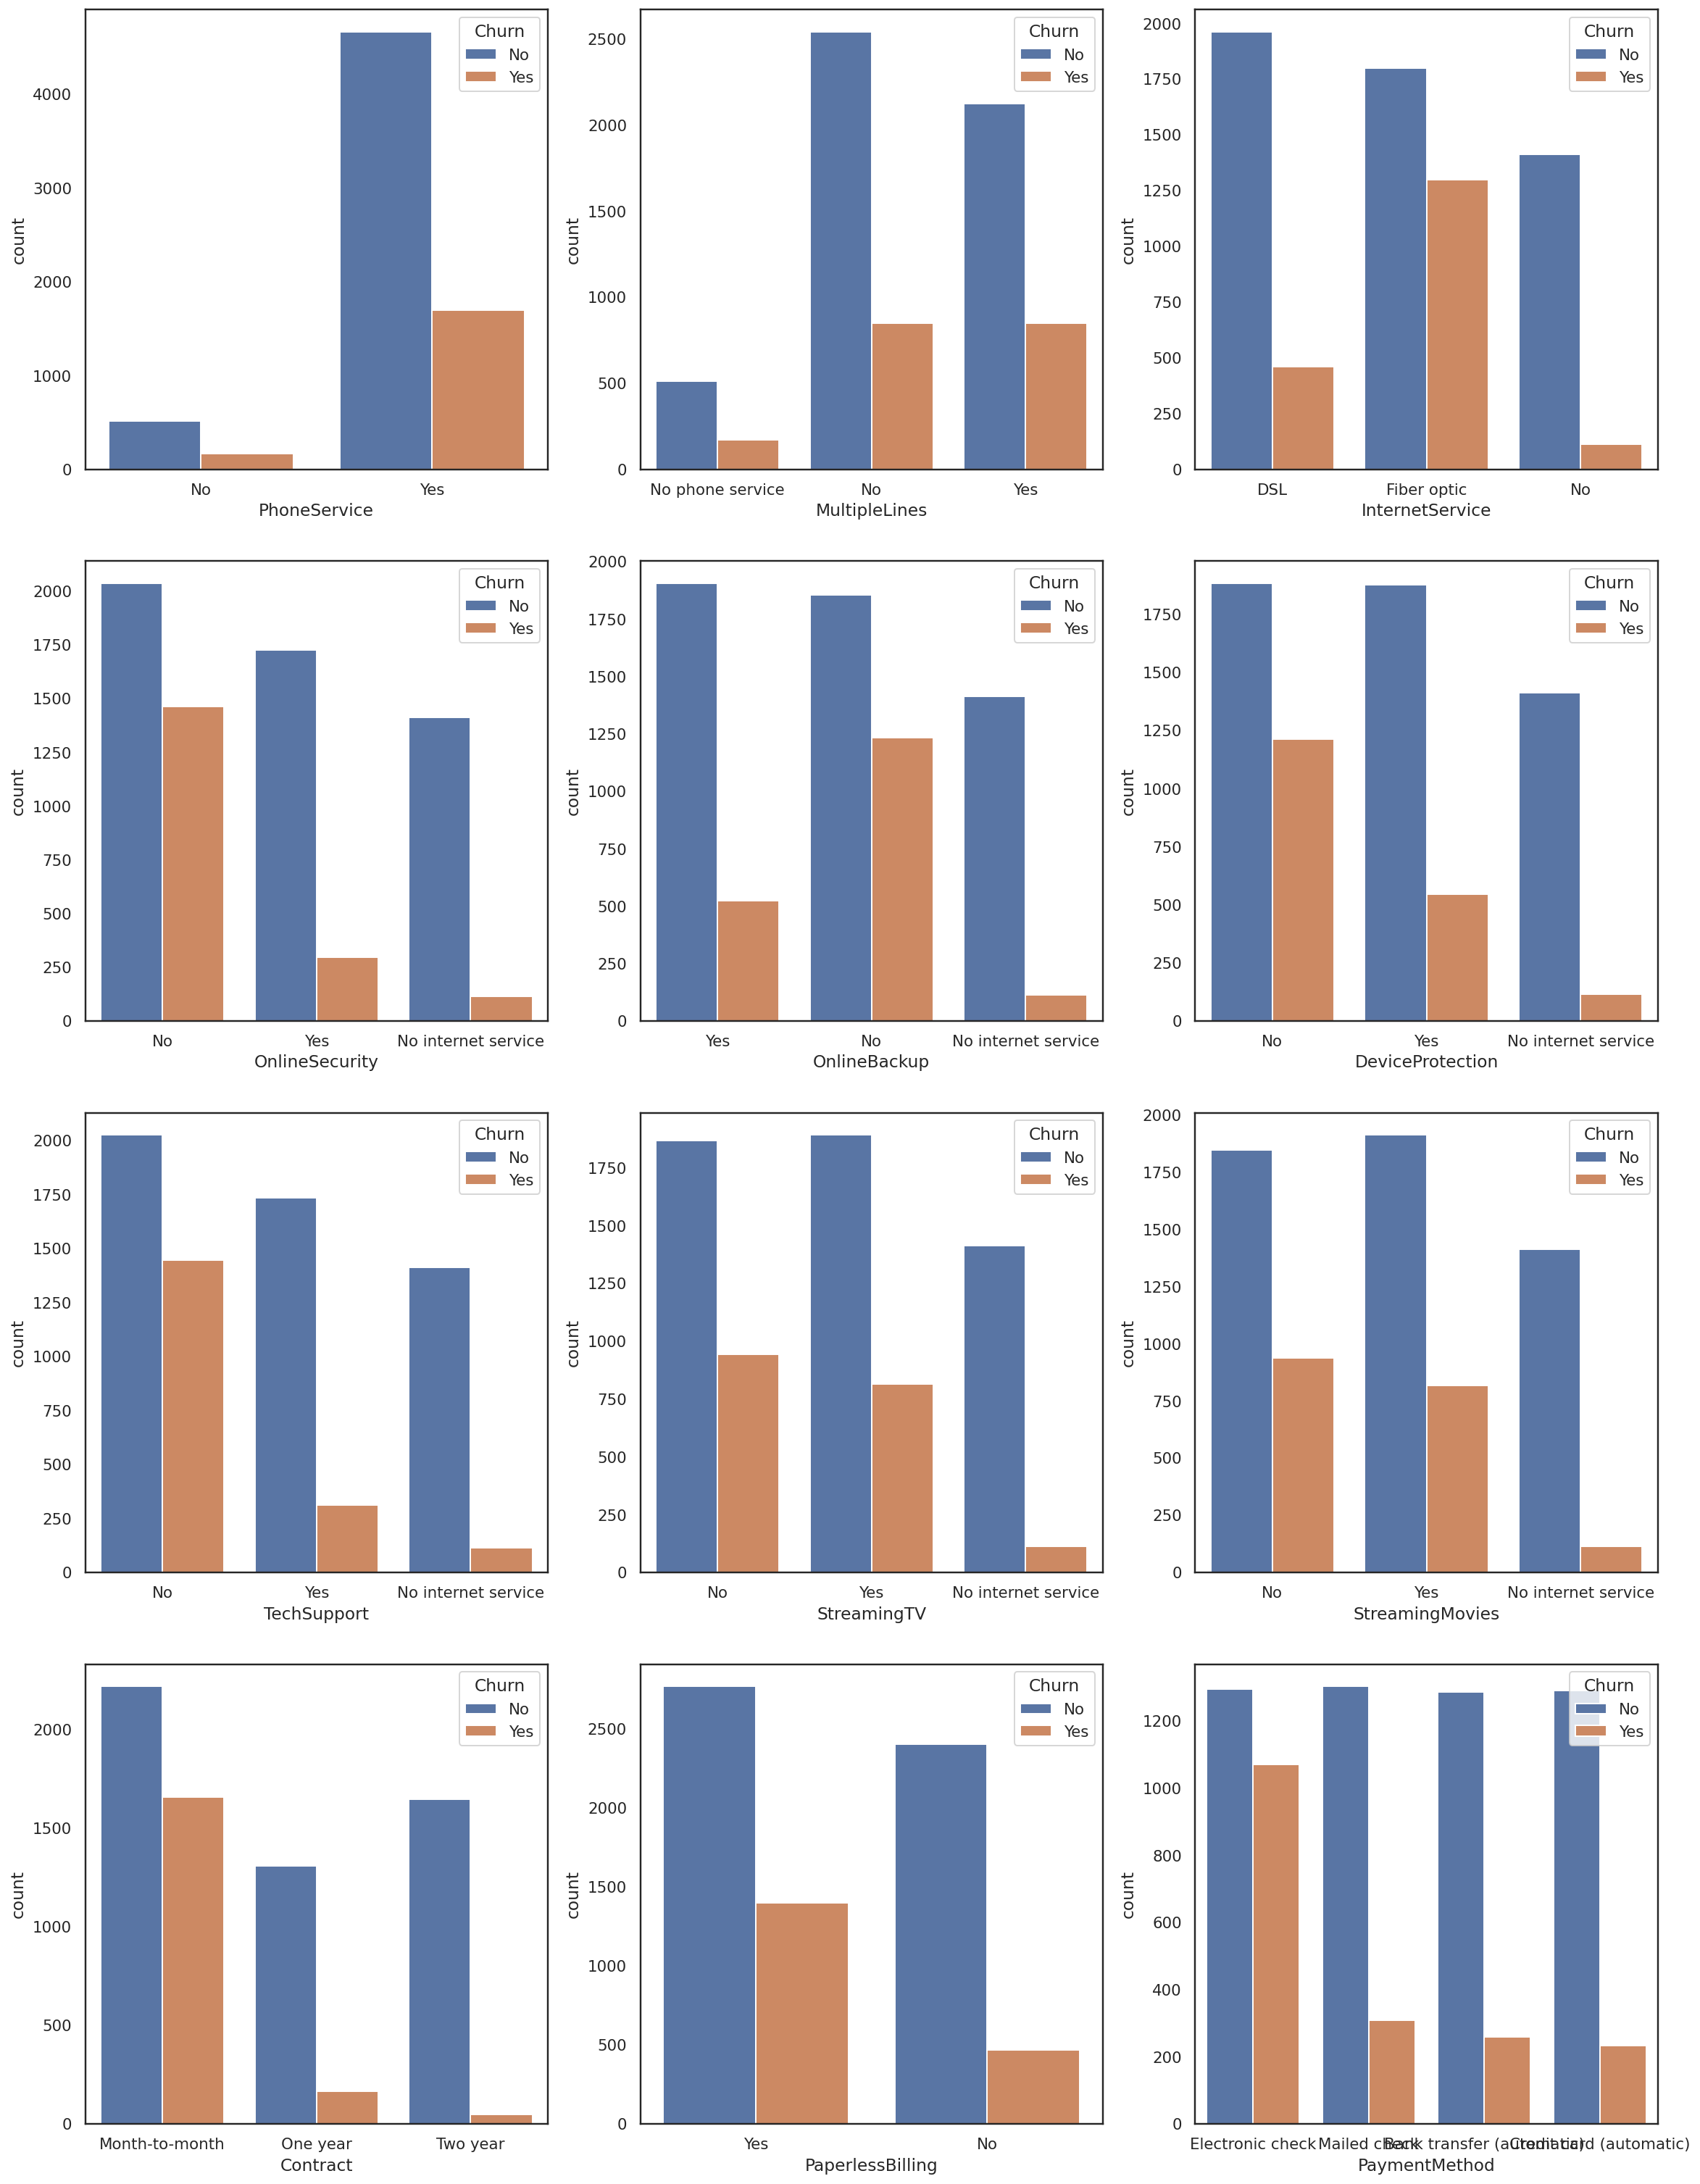

In [43]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('TelcoCustomerChurn.csv',sep=',')
plt.figure(figsize=(20, 42))
columns = {'PhoneService':1, 'MultipleLines':2, 'InternetService':3, 'OnlineSecurity':4, 'OnlineBackup':5, 'DeviceProtection':6,
          'TechSupport':7, 'StreamingTV':8, 'StreamingMovies':9, 'Contract':10, 'PaperlessBilling':11, 'PaymentMethod':12}
for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

In [44]:
df.drop('customerID', axis=1, inplace=True)
df['Churn'].replace(to_replace ='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace = 'No', value=0, inplace=True)
df = pd.get_dummies(df)

from sklearn.linear_model import LogisticRegression
X = df.drop(columns = ['Churn'])
y = df['Churn'].values
Scaler = StandardScaler()
X = Scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
((5625, 45), (1407, 45), (5625,), (1407,))
def apply_model(model1):
    model = model1
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, cv = 6)
    precision = precision_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print ('Train score of '+str(model1)[:-2]+' is', score.mean(),'%')
    print ('--')
    print ('Precision score is ', precision)
    print ('--')
    print ('ROC Score is', roc)
    print ('--')
    print ('Recall Score is ', recall)
    print ('--')
    print ('Confusion Matrix\n\n', cm)

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [47]:
apply_model(LogisticRegression())

Train score of LogisticRegression is 0.7669506567270146 %
--
Precision score is  0.5842696629213483
--
ROC Score is 0.7073918039065492
--
Recall Score is  0.5576407506702413
--
Confusion Matrix

 [[888 148]
 [165 208]]


In [48]:
apply_model(RandomForestClassifier())

Train score of RandomForestClassifier is 0.7866524671636492 %
--
Precision score is  0.6628352490421456
--
ROC Score is 0.6894324427836491
--
Recall Score is  0.46380697050938335
--
Confusion Matrix

 [[948  88]
 [200 173]]
